In [1]:
#sklearn 包实现正则化解决过拟合
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

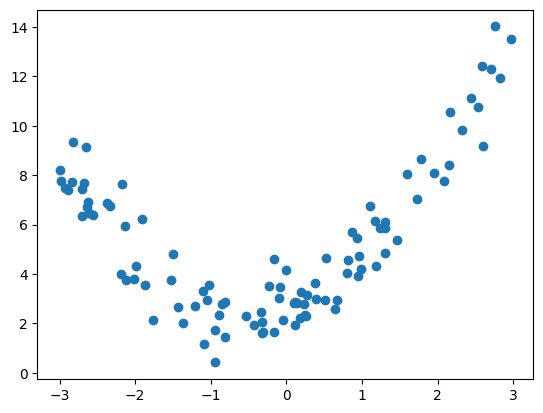

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 + x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)

In [3]:
lin_reg = LinearRegression()

In [7]:
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', lin_reg)
    ])

In [8]:
from sklearn.linear_model import Lasso
#构建Lasso回归算法（L1范数）
def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

In [10]:
#设置随机种子
np.random.seed(666)
#构建数据集
X_train, X_test, y_train, y_test = train_test_split(X, y)
#设置训练参数
lasso_reg1 = LassoRegression(30, 0.1)
lasso_reg1.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=30)),
                ('std_scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=0.1))])

In [ ]:
y1_predict=lasso_reg1.predict(X_test)
mean_squared_error(y_test,y1_predict)